In [1]:
import sncosmo

data = sncosmo.load_example_data()

print(data)

     time      band       flux         fluxerr      zp  zpsys
------------- ----- --------------- -------------- ---- -----
      55070.0 sdssg   0.36351153597 0.672843847541 25.0    ab
55072.0512821 sdssr -0.200801295864 0.672843847541 25.0    ab
55074.1025641 sdssi  0.307494232981 0.672843847541 25.0    ab
55076.1538462 sdssz   1.08776103656 0.672843847541 25.0    ab
55078.2051282 sdssg  -0.43667895645 0.672843847541 25.0    ab
55080.2564103 sdssr   1.09780966779 0.672843847541 25.0    ab
55082.3076923 sdssi    3.7562685627 0.672843847541 25.0    ab
55084.3589744 sdssz   5.34858894966 0.672843847541 25.0    ab
55086.4102564 sdssg   2.82614187269 0.672843847541 25.0    ab
55088.4615385 sdssr   7.56547045054 0.672843847541 25.0    ab
          ...   ...             ...            ...  ...   ...
55131.5384615 sdssi   3.99520404021 0.672843847541 25.0    ab
55133.5897436 sdssz   5.73989458094 0.672843847541 25.0    ab
55135.6410256 sdssg  0.330702283107 0.672843847541 25.0    ab
55137.69


# Fitting a light curve

This example shows how to fit the parameters of a SALT2 model to photometric
light curve data.

First, we'll load an example of some photometric data.


An important additional note: a table of photometric data has a
``band`` column and a ``zpsys`` column that use strings to identify
the bandpass (e.g., ``'sdssg'``) and zeropoint system (``'ab'``) of
each observation. If the bandpass and zeropoint systems in your data
are *not* built-ins known to sncosmo, you must register the
corresponding `~sncosmo.Bandpass` or `~sncosmo.MagSystem` to the
right string identifier using the registry.



In [2]:
# create a model
model = sncosmo.Model(source='salt2')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

The first object returned is a dictionary-like object where the keys
can be accessed as attributes in addition to the typical dictionary
lookup like ``result['ncall']``:



In [3]:
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())

Number of chi^2 function calls: 165
Number of degrees of freedom in fit: 35
chi^2 value at minimum: 33.12503922221964
model parameters: ['z', 't0', 'x0', 'x1', 'c']
best-fit values: [5.16643888e-01 5.51004727e+04 1.17959043e-05 5.89913247e-01
 2.05740650e-01]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


The second object returned is a shallow copy of the input model with
the parameters set to the best fit values. The input model is
unchanged.



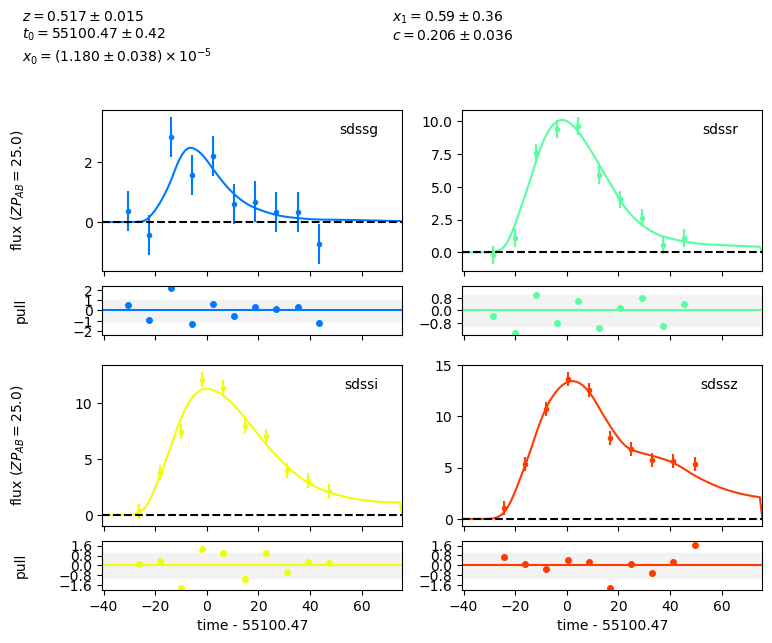

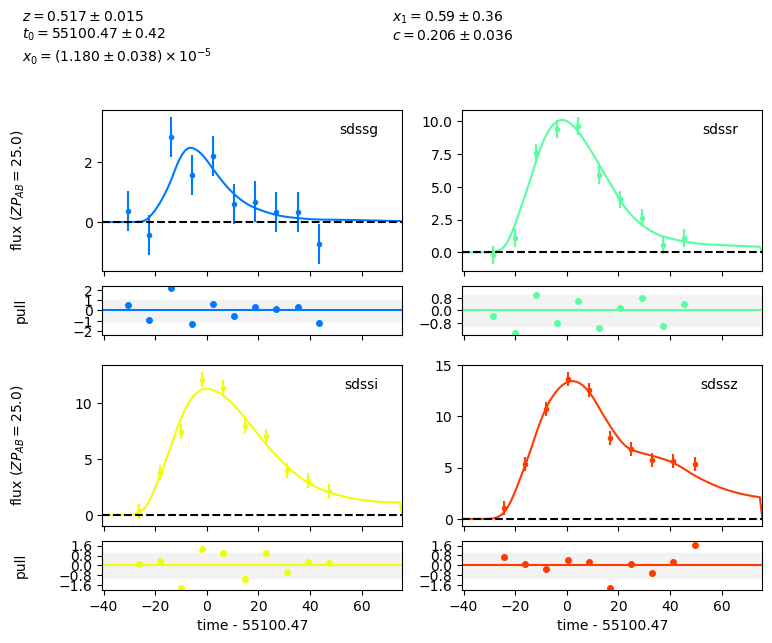

In [4]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)

Suppose we already know the redshift of the supernova we're trying to
fit.  We want to set the model's redshift to the known value, and then
make sure not to vary `z` in the fit.



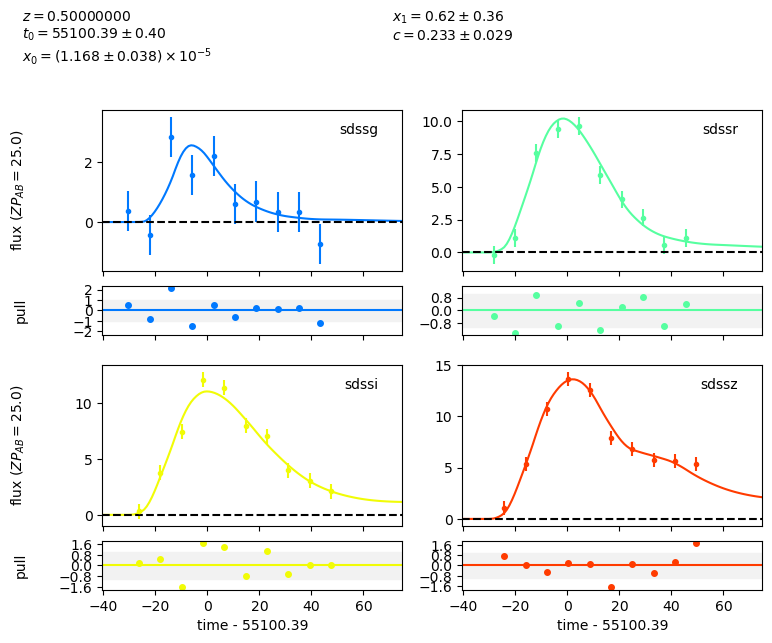

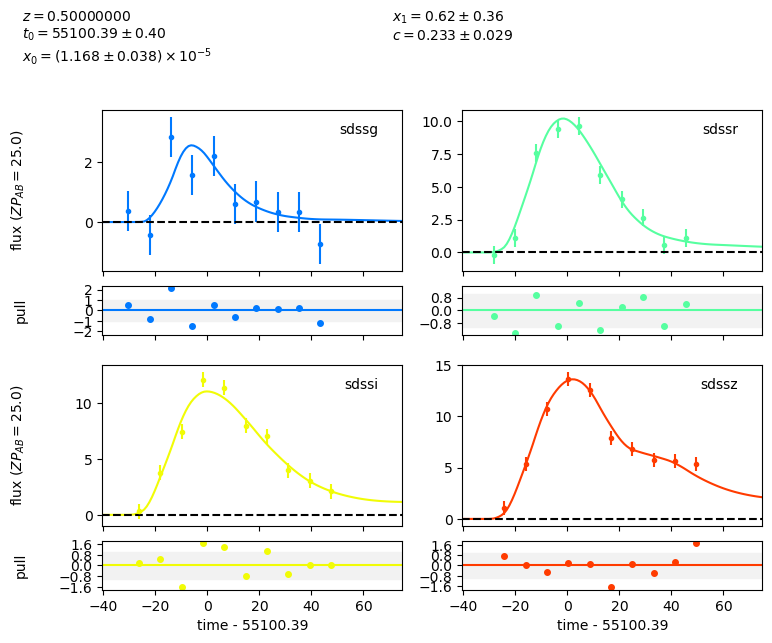

In [5]:
model.set(z=0.5)  # set the model's redshift.
result, fitted_model = sncosmo.fit_lc(data, model,
                                      ['t0', 'x0', 'x1', 'c'])
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)